In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df_results = pd.read_csv("../Results/InvestmentModelResults/Loop_4models_indirect_neighbors_storage_8760_ext.csv")

In [49]:
#Export revenues and congestion rents should be dealt with with opposite signs
# neg_components = ["cong_rent_e","export_rev"]
# df_results[neg_components] = -df_results[neg_components]

# #Split congestion rents equally between neighbors
# rents = ['cong_rent_i', 'cong_rent_e']
# df_results[rents] = df_results[rents]/2

#Combine operational cost components 
operational_costs = ['CO2_cost', 'load_shedding_cost', 'VOM_cost', 'fuel_cost']
df_results["Operational costs"] = df_results[operational_costs].sum(axis=1)

cost_vals = ['CO2_cost', 'load_shedding_cost', 'VOM_cost', 'fuel_cost']#,'investment_cost', 'export_rev',"import_cost", 'cong_rent_i', 'cong_rent_e']
df_results["Total cost"] = df_results[cost_vals].sum(axis=1)

In [50]:
def create_model_type_name(row,columns):
    strings = [str(row[col]) for col in columns if pd.notna(row[col])]
    return '-'.join(strings)

In [51]:
df_results.geoscope_m

AttributeError: 'DataFrame' object has no attribute 'geoscope_m'

In [56]:
##Start with some renaming for clarity 
geo_scope_map = {
    'DE00_NL00_FR00_UK00_BE00_LUG1': 'DN',
    'N_A': '',
    "A_l_l":"All"
}
df_results["geoscope_m"] = df_results["geoscope"].map(geo_scope_map)

# List of columns to consider for joining
columns_to_join = ['type', 'trans_cap_other', 'geoscope_m', 'stepsize',"target_cap_for_curves","simplified"]

# Apply the function row-wise to create the new column
df_results['name'] = df_results.apply(create_model_type_name, args=(columns_to_join,), axis=1)

# name_map = {
#     'NTC-1.0e10-DN': 'NTC-Inf',
#     'NTC-1.0e10-All': 'SN-All',
#     'NTC-S-All': "NTC-All",
#     'NTC-S-DN': "NTC",
#     'TCPC-DN': "TCPC",
#     "isolated-" : "Isolated",
#     "TCS-DN-100.0": "TCS-100",
#     "TCS-DN-1000.0": "TCS-1000",
#     "TCS-DN-10.0": "TCS-10",
#     "TCS-DN-1.0": "TCS-1",
#     "NTC-0-DN": "NTC-0"

# }
df_results['Model Type'] = df_results["name"].replace(name_map)


In [57]:
df_results["Model Type"]

0                     NTC-S-All-False
1              NTC-1.00E+10-All-False
2     TCS-All-100.0-endo_invest-False
3      TCS-All-10.0-endo_invest-False
4           TCS-All-100.0-TYNDP-False
5            TCS-All-10.0-TYNDP-False
6                        TCPC-DN-True
7                        TCPC-DN-True
8                       TCPC-All-True
9                      isolated--True
10                      NTC-S-DN-True
11               NTC-1.00E+10-DN-True
12                     NTC-S-All-True
13              NTC-1.00E+10-All-True
14      TCS-DN-100.0-endo_invest-True
15     TCS-All-100.0-endo_invest-True
Name: Model Type, dtype: object

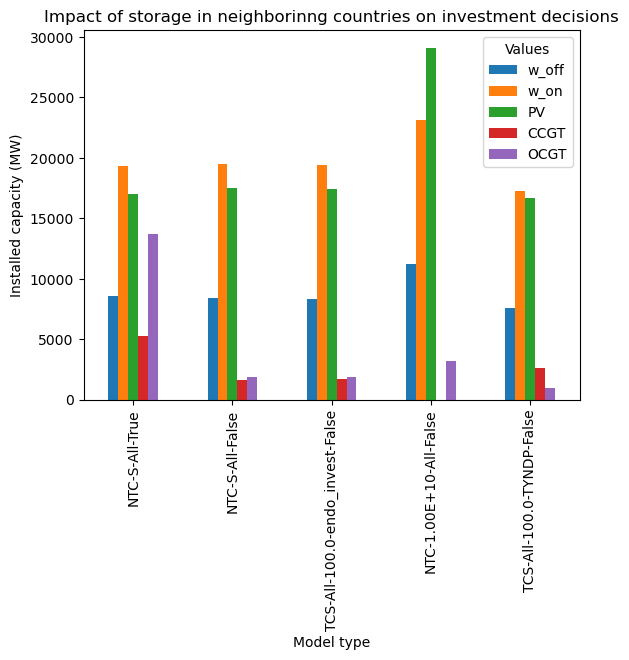

In [69]:
## Plot installed capacities 

# Define the types to include and order in which you want the types to appear
type_order = ["NTC-S-All-True","NTC-S-All-False","TCS-All-100.0-endo_invest-False","NTC-1.00E+10-All-False","TCS-All-100.0-TYNDP-False"]
filter_condition = df_results["Model Type"].isin(type_order)

filtered_df = df_results[filter_condition].set_index("Model Type").reindex(type_order).reset_index()

#Choose the values to be displayed
stacked = False
if stacked: 
    vals= ["CCGT", "OCGT","PV","w_on","w_off"]
else:
    vals = [ "w_off", "w_on","PV","CCGT", "OCGT"]
#vals = ["imported","exported"]


filtered_df.plot.bar(x="Model Type", y=vals, stacked=stacked)

plt.xlabel('Model type')
plt.ylabel('Installed capacity (MW)')
plt.title('Impact of storage in neighborinng countries on investment decisions')
plt.legend(title='Values')
#plt.show()
plt.savefig(f"../Results/Figures/FY_analysis/DirectNeighbors//Installed_capacities_bar_{stacked}_DN.png")